### Importing Libraries

In [237]:
import numpy as np
import matplotlib.pyplot as plt

### Setting the Parameters

In [238]:
D = 0.20          # initial density of positive opinions 
w = 0.90          # Individuals' risk perception parameter
alpha = 0.1       # Infected -> recovers -> Susceptible 

phi = 0.01        # Resusceptibility probability : vaccinated -> susceptible 
N = 10000         # Population size
mcs = 100         # Monte Carlo steps

In [239]:
lambda_values = [0.1, 0.6, 0.7, 0.8] 

The conditions: <br>
$D~\ge~U(0, 1) $ <br>
$\gamma ~ \ge ~ U(0, 1)$ <br>
$\phi ~ \ge ~ U(0, 1)$ <br>
$\alpha ~ \ge ~ U(0, 1)$ <br>
$\lambda ~ \ge ~ U(0, 1)$ 

### Initializing some agents as infected at t = 0
> using fluxogram condition for susceptible to infected

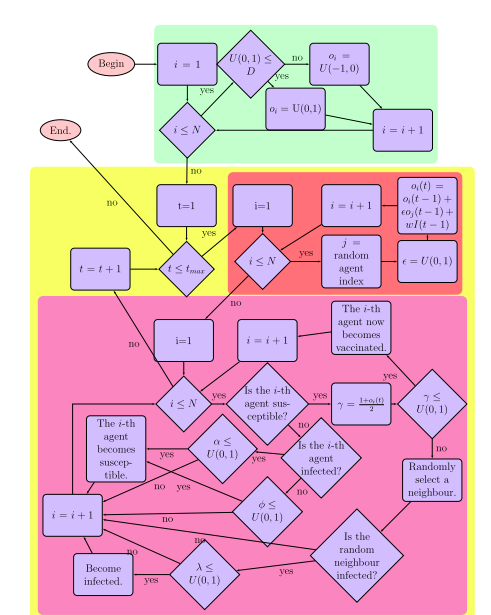

In [248]:

def simulate(lambda_value):
    # Initialize epidemic compartments
    opinions = np.zeros(N)
    for i in range(N):
        if np.random.uniform(0, 1) <= D:
            opinions[i] = np.random.uniform(0, 1)  # Pro-vaccine
        else:
            opinions[i] = np.random.uniform(-1, 0)  # Anti-vaccine

    susceptible = np.ones(N)
    infected = np.zeros(N)
    # setting some random agents as infected
    random_indices = np.random.randint(0, N, 10)
    for i in random_indices:
        infected[i] = 1
        susceptible[i] = 0

    vaccinated = np.zeros(N)
    
    time_series_infected = []
    time_series_vaccinated = []
    time_series_average_opinion = []

    # run the simulations
    for k in range(0, mcs):
        epsilon = np.random.uniform(0, 1)  # Stochastic variable epsilon uniformly distributed in [0.1]
        new_opinions = np.zeros(N)
        
        for i in range(N):
            j = np.random.randint(N)  # Randomly select agent j
            new_opinions[i] = opinions[i] + epsilon * opinions[j] + w * np.mean(infected)  # Equation 1
            
            # Check upper and lower bounds for opinions
            if new_opinions[i] > 1:
                new_opinions[i] = 1
            elif new_opinions[i] < -1:
                new_opinions[i] = -1
        
        opinions = new_opinions

        # Update gamma
        gamma = (1 + opinions) / 2

        # Update epidemic compartments
        for i in range(N):
            if susceptible[i] == 1:
                # Susceptible -> Vaccinated transition
                if np.random.uniform(0, 1) <= gamma[i]:
                    vaccinated[i] = 1
                    susceptible[i] = 0
                     # Susceptible -> Infected transition
                elif infected[np.random.randint(N)] == 1 and np.random.uniform(0, 1) <= lambda_value:
                    infected[i] = 1
                    susceptible[i] = 0
                
            elif infected[i] == 1:
                # Infected -> Susceptible (Recovered) transition
                if np.random.uniform(0, 1) <= alpha:
                    infected[i] = 0
                    susceptible[i] = 1
            elif vaccinated[i] == 1:
                # Vaccinated -> Susceptible (Resusceptibility) transition
                if np.random.uniform(0, 1) <= phi:
                    vaccinated[i] = 0
                    susceptible[i] = 1

        # Compute densities
        density_infected = np.mean(infected)
        density_vaccinated = np.mean(vaccinated)
        average_opinion = np.mean(opinions)

        # Append data to time series
        time_series_infected.append(density_infected)
        time_series_vaccinated.append(density_vaccinated)
        time_series_average_opinion.append(average_opinion)
    
    return time_series_infected, time_series_vaccinated, time_series_average_opinion


/tmp/ipykernel_16270/600304980.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


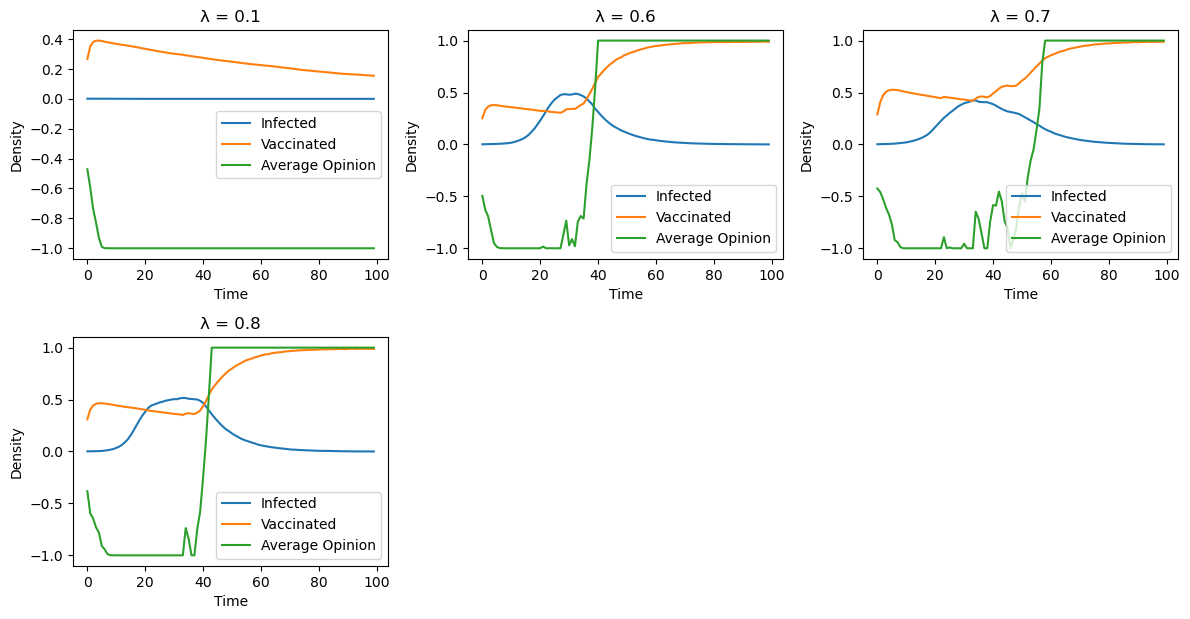

In [249]:
# Simulate and get time series data for different lambda values
plt.figure(figsize=(12, 12))

for idx, lambda_val in enumerate(lambda_values):
    infected_series, vaccinated_series, opinion_series = simulate(lambda_val)
    plt.subplot(4, 3, idx + 1)
    plt.plot(infected_series, label='Infected')
    plt.plot(vaccinated_series, label='Vaccinated')
    plt.plot(opinion_series, label='Average Opinion')
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'λ = {lambda_val}')
    plt.tight_layout()

plt.show()


## Baseline Simulation 
> using second definition of S -> I

In [246]:

def simulate(lambda_value):
    # Initialize epidemic compartments
    opinions = np.zeros(N)
    for i in range(N):
        if np.random.uniform(0, 1) <= D:
            opinions[i] = np.random.uniform(0, 1)  # Pro-vaccine
        else:
            opinions[i] = np.random.uniform(-1, 0)  # Anti-vaccine

    susceptible = np.ones(N)
    infected = np.zeros(N)
    # setting some random agents as infected
    random_indices = np.random.randint(0, N, 10)
    for i in random_indices:
        infected[i] = 1
        susceptible[i] = 0

    vaccinated = np.zeros(N)
    
    time_series_infected = []
    time_series_vaccinated = []
    time_series_average_opinion = []

    for k in range(0, mcs):
        # print("mcs \n", k)
        epsilon = np.random.uniform(0, 1)  # Stochastic variable epsilon uniformly distributed in [0.1]
        new_opinions = np.zeros(N)

        # print("# of infected ", np.sum(infected))
        # print("# of vaccinated ", np.sum(vaccinated))
        # print("# of susceptible ", np.sum(susceptible))
        # print("\n")

        for i in range(N):
            j = np.random.randint(N)  # Randomly select agent j
            new_opinions[i] = opinions[i] + epsilon * opinions[j] + w * np.mean(infected)  # Equation 1
            
            # Check upper and lower bounds for opinions
            if new_opinions[i] > 1:
                new_opinions[i] = 1
            elif new_opinions[i] < -1:
                new_opinions[i] = -1
        
        opinions = new_opinions

        # Update gamma
        gamma = (1 + opinions) / 2

        # Update epidemic compartments
        for i in range(N):
            # print("susceptible ")
            # print(susceptible[i])
            # print("\n")

            if susceptible[i] == 1:
                # print("gamma " , gamma[i])
                # print("val " , ((1 - gamma[i]) * 0.1 * np.sum(infected)) )
                # print("\n")
                # Susceptible -> Vaccinated transition
                if np.random.uniform(0, 1) <= gamma[i]:
                    vaccinated[i] = 1
                    susceptible[i] = 0
                     # Susceptible -> Infected transition
                elif np.random.uniform(0, 1) <= ((1 - gamma[i]) * lambda_value * np.mean(infected)): #lambda dependent
                    # print("Infection")
                    infected[i] = 1
                    susceptible[i] = 0
                    
                
            elif infected[i] == 1:
                # Infected -> Susceptible (Recovered) transition
                if np.random.uniform(0, 1) <= alpha:
                    infected[i] = 0
                    susceptible[i] = 1
            elif vaccinated[i] == 1:
                # Vaccinated -> Susceptible (Resusceptibility) transition
                if np.random.uniform(0, 1) <= phi:
                    vaccinated[i] = 0
                    susceptible[i] = 1

        # Compute densities
        density_infected = np.mean(infected)
        density_vaccinated = np.mean(vaccinated)
        average_opinion = np.mean(opinions)

        # Append data to time series
        time_series_infected.append(density_infected)
        time_series_vaccinated.append(density_vaccinated)
        time_series_average_opinion.append(average_opinion)
    
    return time_series_infected, time_series_vaccinated, time_series_average_opinion




/tmp/ipykernel_16270/405418415.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


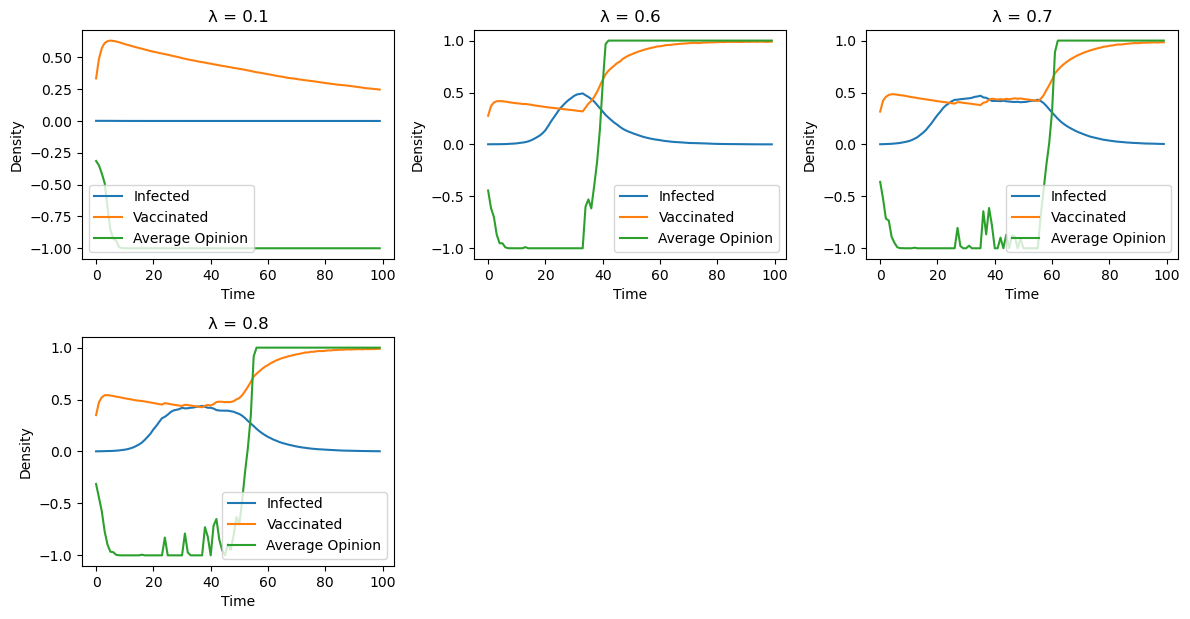

In [247]:
# Simulate and get time series data for different lambda values
plt.figure(figsize=(12, 12))

for idx, lambda_val in enumerate(lambda_values):
    infected_series, vaccinated_series, opinion_series = simulate(lambda_val)
    plt.subplot(4, 3, idx + 1)
    plt.plot(infected_series, label='Infected')
    plt.plot(vaccinated_series, label='Vaccinated')
    plt.plot(opinion_series, label='Average Opinion')
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'λ = {lambda_val}')
    plt.tight_layout()

plt.show()

## Bug Fixing

In [226]:
opinions = np.zeros(N)
for i in range(N):
        if np.random.uniform(0, 1) <= D:
            opinions[i] = np.random.uniform(0, 1)  # Pro-vaccine
        else:
            opinions[i] = np.random.uniform(-1, 0)  # Anti-vaccine
opinions

array([-0.21362568, -0.34004295,  0.17567862, ..., -0.46925554,
       -0.88032357, -0.63409458])

In [227]:
susceptible = np.ones(N)
susceptible

array([1., 1., 1., ..., 1., 1., 1.])

In [228]:
infected = np.zeros(N)
infected

array([0., 0., 0., ..., 0., 0., 0.])

In [229]:
random_indices = np.random.randint(0, N, 10)
random_indices

array([4759, 7862, 1053, 3935,  257, 1065, 5595, 2880, 8389, 3469])

In [230]:
for i in random_indices:
    infected[i] = 1
    susceptible[i] = 0

In [231]:
vaccinated = np.zeros(N)

In [232]:
time_series_infected = []
time_series_vaccinated = []
time_series_average_opinion = []

In [251]:
lambda_value = 0.6

In [250]:
for k in range(0, mcs):
        print("mcs \n", k)
        epsilon = np.random.uniform(0, 1)  # Stochastic variable epsilon uniformly distributed in [0.1]
        new_opinions = np.zeros(N)

        print("# of infected ", np.sum(infected))
        print("# of vaccinated ", np.sum(vaccinated))
        print("# of susceptible ", np.sum(susceptible))
        print("\n")

        for i in range(N):
            j = np.random.randint(N)  # Randomly select agent j
            new_opinions[i] = opinions[i] + epsilon * opinions[j] + w * np.mean(infected)  # Equation 1
            
            # Check upper and lower bounds for opinions
            if new_opinions[i] > 1:
                new_opinions[i] = 1
            elif new_opinions[i] < -1:
                new_opinions[i] = -1
        
        opinions = new_opinions

        # Update gamma
        gamma = (1 + opinions) / 2

        # Update epidemic compartments
        for i in range(N):
            # print("susceptible ")
            # print(susceptible[i])
            # print("\n")

            if susceptible[i] == 1:
                # print("gamma " , gamma[i])
                # print("val " , ((1 - gamma[i]) * 0.1 * np.sum(infected)) )
                # print("\n")
                # Susceptible -> Vaccinated transition
                if np.random.uniform(0, 1) <= gamma[i]:
                    vaccinated[i] = 1
                    susceptible[i] = 0
                     # Susceptible -> Infected transition
                elif np.random.uniform(0, 1) <= ((1 - gamma[i]) * lambda_value * np.mean(infected)): #lambda dependent
                    # print("Infection")
                    infected[i] = 1
                    susceptible[i] = 0
                    
                
            elif infected[i] == 1:
                # Infected -> Susceptible (Recovered) transition
                if np.random.uniform(0, 1) <= alpha:
                    infected[i] = 0
                    susceptible[i] = 1
            elif vaccinated[i] == 1:
                # Vaccinated -> Susceptible (Resusceptibility) transition
                if np.random.uniform(0, 1) <= phi:
                    vaccinated[i] = 0
                    susceptible[i] = 1

        # Compute densities
        density_infected = np.mean(infected)
        density_vaccinated = np.mean(vaccinated)
        average_opinion = np.mean(opinions)

        # Append data to time series
        time_series_infected.append(density_infected)
        time_series_vaccinated.append(density_vaccinated)
        time_series_average_opinion.append(average_opinion)

mcs 
 0
# of infected  7.0
# of vaccinated  9902.0
# of susceptible  91.0


mcs 
 1
# of infected  6.0
# of vaccinated  9902.0
# of susceptible  92.0


mcs 
 2
# of infected  6.0
# of vaccinated  9898.0
# of susceptible  96.0


mcs 
 3
# of infected  6.0
# of vaccinated  9896.0
# of susceptible  98.0


mcs 
 4
# of infected  4.0
# of vaccinated  9890.0
# of susceptible  106.0


mcs 
 5
# of infected  3.0
# of vaccinated  9889.0
# of susceptible  108.0


mcs 
 6
# of infected  3.0
# of vaccinated  9904.0
# of susceptible  93.0


mcs 
 7
# of infected  3.0
# of vaccinated  9876.0
# of susceptible  121.0


mcs 
 8
# of infected  2.0
# of vaccinated  9883.0
# of susceptible  115.0


mcs 
 9
# of infected  1.0
# of vaccinated  9907.0
# of susceptible  92.0


mcs 
 10
# of infected  1.0
# of vaccinated  9909.0
# of susceptible  90.0


mcs 
 11
# of infected  1.0
# of vaccinated  9890.0
# of susceptible  109.0


mcs 
 12
# of infected  1.0
# of vaccinated  9896.0
# of susceptible  103.0


mcs

In [235]:
new_opinions

array([1., 1., 1., ..., 1., 1., 1.])

/tmp/ipykernel_16270/1422540710.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


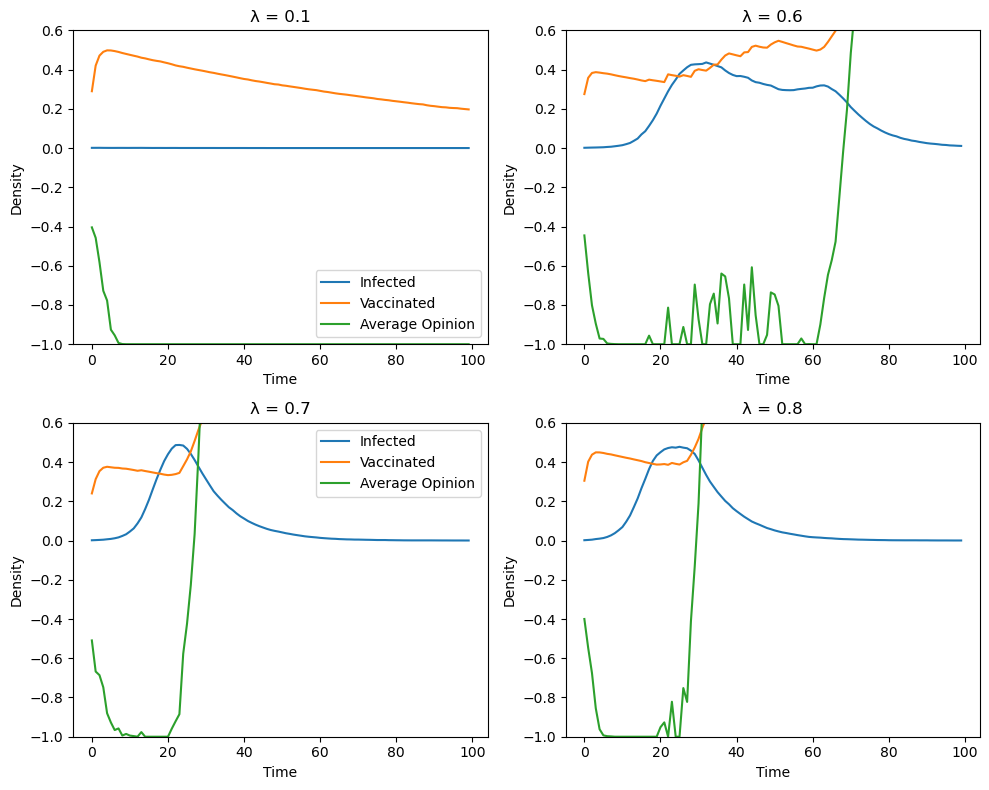

In [253]:
# Plotting the simulation results for different lambda values
plt.figure(figsize=(10, 8))

for idx, lambda_val in enumerate(lambda_values):
    infected_series, vaccinated_series, opinion_series = simulate(lambda_val)
    plt.subplot(2, 2, idx + 1)  # Adjusted the subplot index calculation
    plt.plot(infected_series, label='Infected')
    plt.plot(vaccinated_series, label='Vaccinated')
    plt.plot(opinion_series, label='Average Opinion')
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.ylim(-1, 0.6)  # Set y-axis limits for infected and vaccinated
    if idx % 2 == 0:
        plt.legend()
    plt.title(f'λ = {lambda_val}')
    plt.tight_layout()

plt.show()
